# Belief sharing

This notebook does some basic belief sharing between two search agents.

In [1]:
%load_ext autoreload
%autoreload 2

import sys

if ".." not in sys.path:
    sys.path.append("..")

import numpy as np
np.random.seed(1337)

## Environment

We setup a simple line enviroment.

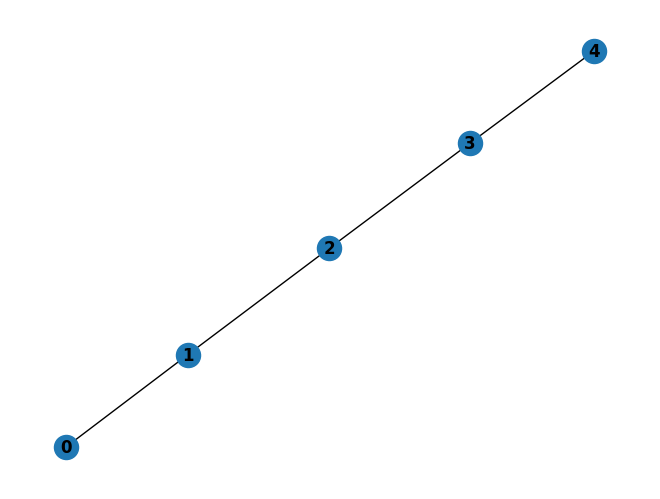

In [2]:
import util
import networkx as nx
from envs import GraphEnv

graph, metadata = util.generate_line(5)
nx.draw(graph, with_labels=True, font_weight="bold")

agent_config = {
        "Agent 1": 2,
        "Agent 2" : 2
    }
object_config = {"Food": 0}

# create environment
env = GraphEnv(graph, agent_config, object_config)

## Agents

Now we create two `SearchAgent`.

In [3]:
from agents import SearchAgent, BeliefShareAgent

agents = [
    SearchAgent(a, env, [0], sophisticated=True, planning_horizon=3)
    for a in agent_config.keys()
]

agents = [
    BeliefShareAgent(
        a,
        others=[o for o in agents if o != a],
        shared_states=[1],  # object location is "shared" state
    )
    for a in agents
]

## Experiment

Both agents share beliefs, so once one agent finds the object, this is communicated to the other and it moves to that location as well.

In [4]:
from experiment import tick

result = {a: [] for a in agent_config.keys()}

# simulate T timesteps
T = 10
for t in range(T):
    info = tick(agents, env)
    for a, info in info.items():
        result[a].append(info)

Agent 1 moved to location 3
Agent 2 moved to location 2
Agent 2 moved to location 1
Agent 1 moved to location 4
Agent 1 moved to location 4
Agent 2 moved to location 0 and observed object
Agent 1 moved to location 3
Agent 2 moved to location 0 and observed object
Agent 1 moved to location 2
Agent 2 moved to location 0 and observed object
Agent 2 moved to location 0 and observed object
Agent 1 moved to location 1
Agent 1 moved to location 0 and observed object
Agent 2 moved to location 0 and observed object
Agent 1 moved to location 0 and observed object
Agent 2 moved to location 0 and observed object
Agent 2 moved to location 0 and observed object
Agent 1 moved to location 0 and observed object
Agent 2 moved to location 0 and observed object
Agent 1 moved to location 0 and observed object


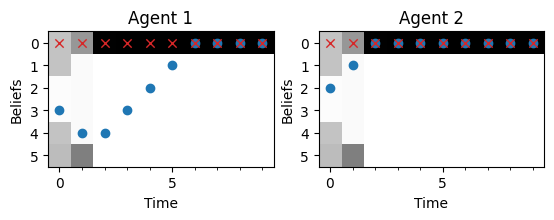

In [5]:
from visualize import *

plot_beliefs(result)